### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named '[A Combined E-commerce Dataset.csv](data/The%20E-commerce%20Dataset.csv)'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="resources/Fig1 The Combined E commerce Dataset.png" align="left" width="400"/>


#### Initial import statements for libraries and datasets go here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading data from the .csv file
data_set = 'data/The E-commerce Dataset.csv'

#storing data into dataframe
data_frame = pd.read_csv(data_set)

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

**Displaying the head of initial dataframe**

In [3]:
#displaying the first 5 rows of the initial dataframe because displaying the full frame would not look nice
data_frame.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


**Counting null values from the dataframe**

In [4]:
#counting null records in each column of the initial un-clean dataset
missing_count_gender = data_frame['gender'].isnull().sum()
missing_count_rating = data_frame['rating'].isnull().sum()
missing_count_helpfulness = data_frame['helpfulness'].isnull().sum()
none_count_review = (data_frame['review'].str.lower() == 'none').sum()

#Printing total rows along with the counts of missing rows in each field
print("Number of records missing in 'gender' : ", missing_count_gender)
print("Number of records missing in 'rating' : ", missing_count_rating)
print("Number of records missing in 'helpfulness' : ", missing_count_helpfulness)
print("Number of 'none' records in 'review' : ", none_count_review)


Number of records missing in 'gender' :  27
Number of records missing in 'rating' :  17
Number of records missing in 'helpfulness' :  22
Number of 'none' records in 'review' :  18


**Cleaning up the null values and comparing un-clean and clean dataframes**

In [5]:
#initial number of rows
initial_count= len(data_frame)
#removing null records from 'gender', 'rating', 'helpfulness' columns
data_frame.dropna(subset=['gender', 'rating', 'helpfulness'], inplace=True)
#removing records with 'none' value from 'review' column and storing in a new dataframe
cleaned_data_frame = data_frame.drop(data_frame[data_frame['review'] == 'none'].index)

#Comparing the initial and clean dataset counts
print("Total rowsn in the initial un-clean dataframe : ", initial_count)
print("Total rows in the dataframe after cleaning : ", len(cleaned_data_frame))

Total rowsn in the initial un-clean dataframe :  20000
Total rows in the dataframe after cleaning :  19916


**displaying the head of the cleaned data_frame**

In [6]:
#displaying the first 5 rows of the cleaned dataframe
cleaned_data_frame.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories

In [7]:
# number of unique rows for each column can be found using the function nunique()
print("Total unique users:", cleaned_data_frame['userId'].nunique())
print("Total unique reviews:", cleaned_data_frame['review'].nunique())
print("Total unique items:", cleaned_data_frame['item_id'].nunique())
print("Total unique categories:", cleaned_data_frame['category'].nunique())
cleaned_data_frame.describe()

Total unique users: 8562
Total unique reviews: 19459
Total unique items: 89
Total unique categories: 9


,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,19916.000000,19916.000000,19916.000000,19916.000000,19916.000000,19916.000000,19916.000000
mean,5498.589827,58993.228008,3.701798,2.595953,41.779976,82.186515,19.403043
std,3344.391672,37957.960964,1.404451,1.750888,27.278416,42.242266,11.626979
min,0.000000,10100.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,1991.000000,21500.000000,3.000000,0.000000,17.000000,48.250000,9.000000
50%,5892.000000,52701.000000,4.000000,4.000000,41.000000,72.000000,19.000000
75%,8408.250000,91599.000000,5.000000,4.000000,65.000000,126.500000,30.000000
max,10808.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [8]:
# descriptive statistics regarding all records can be found using the function describe()
cleaned_data_frame['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 

In [22]:
# using the function groupby(value) can sort a field in separate groups for ease of analysis
gender_item = cleaned_data_frame.groupby(['gender'])['item'].count().reset_index(name='count')
gender_item['count'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64

* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 

In [10]:
# using the function groupby(value), same as in the previous part
item_rating = cleaned_data_frame.groupby(['item'])['rating'].count().reset_index(name='count')
item_rating['count'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),939.0,2.500532,1.368528,1.0,1.00,2.0,4.0,5.0
All Advantage,657.0,3.412481,1.541706,1.0,2.00,4.0,5.0,5.0
Alta Vista (by 1stUp),157.0,3.541401,1.263341,1.0,3.00,4.0,4.0,5.0
Amazon.com,240.0,3.683333,1.571095,1.0,2.00,4.0,5.0,5.0
American Airlines,185.0,3.054054,1.417015,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Wendy's,210.0,3.971429,1.093322,1.0,3.25,4.0,5.0,5.0
What Lies Beneath,160.0,3.450000,1.201676,1.0,3.00,3.5,4.0,5.0
X-Men,245.0,4.118367,0.853074,1.0,4.00,4.0,5.0,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female users tend to provide higher ratings than male users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

__Correlation between Gender and Rating__

In order to correlate between the genders and respective ratings, it should be seen how spread apart both genders are in terms of giving each rating. 

The following subplots show these comparisons between both genders. The bar plot and line graph both show that there are slightly more male users in the dataset, however the trend is extremely similar for both genders. The only difference seems to be that more males give low ratings (1 or 2) than females. 

The boxplot also shows similarities between ratings given by either gender such as the median, upper quartile, lower quartile, minimum, maximum values are the same for both males and females, despite a difference in total number of males and females.

The bar plot for average rating given by either gender shows a slightly higher mean for Females than Males. This can be confirmed from Q2.3, which shows numeric value of mean rating for Males to be 3.68 and mean rating for Females to be 3.71 (less than 1% difference). 

In [11]:
# Cross-Tabulation between each gender and rating
gender_rating_count = pd.crosstab(cleaned_data_frame['rating'], cleaned_data_frame['gender'])
gender_rating_mean = cleaned_data_frame.groupby('gender')['rating'].mean()

Text(0.5, 1.0, 'Bar Plot for Average Rating for each Gender')

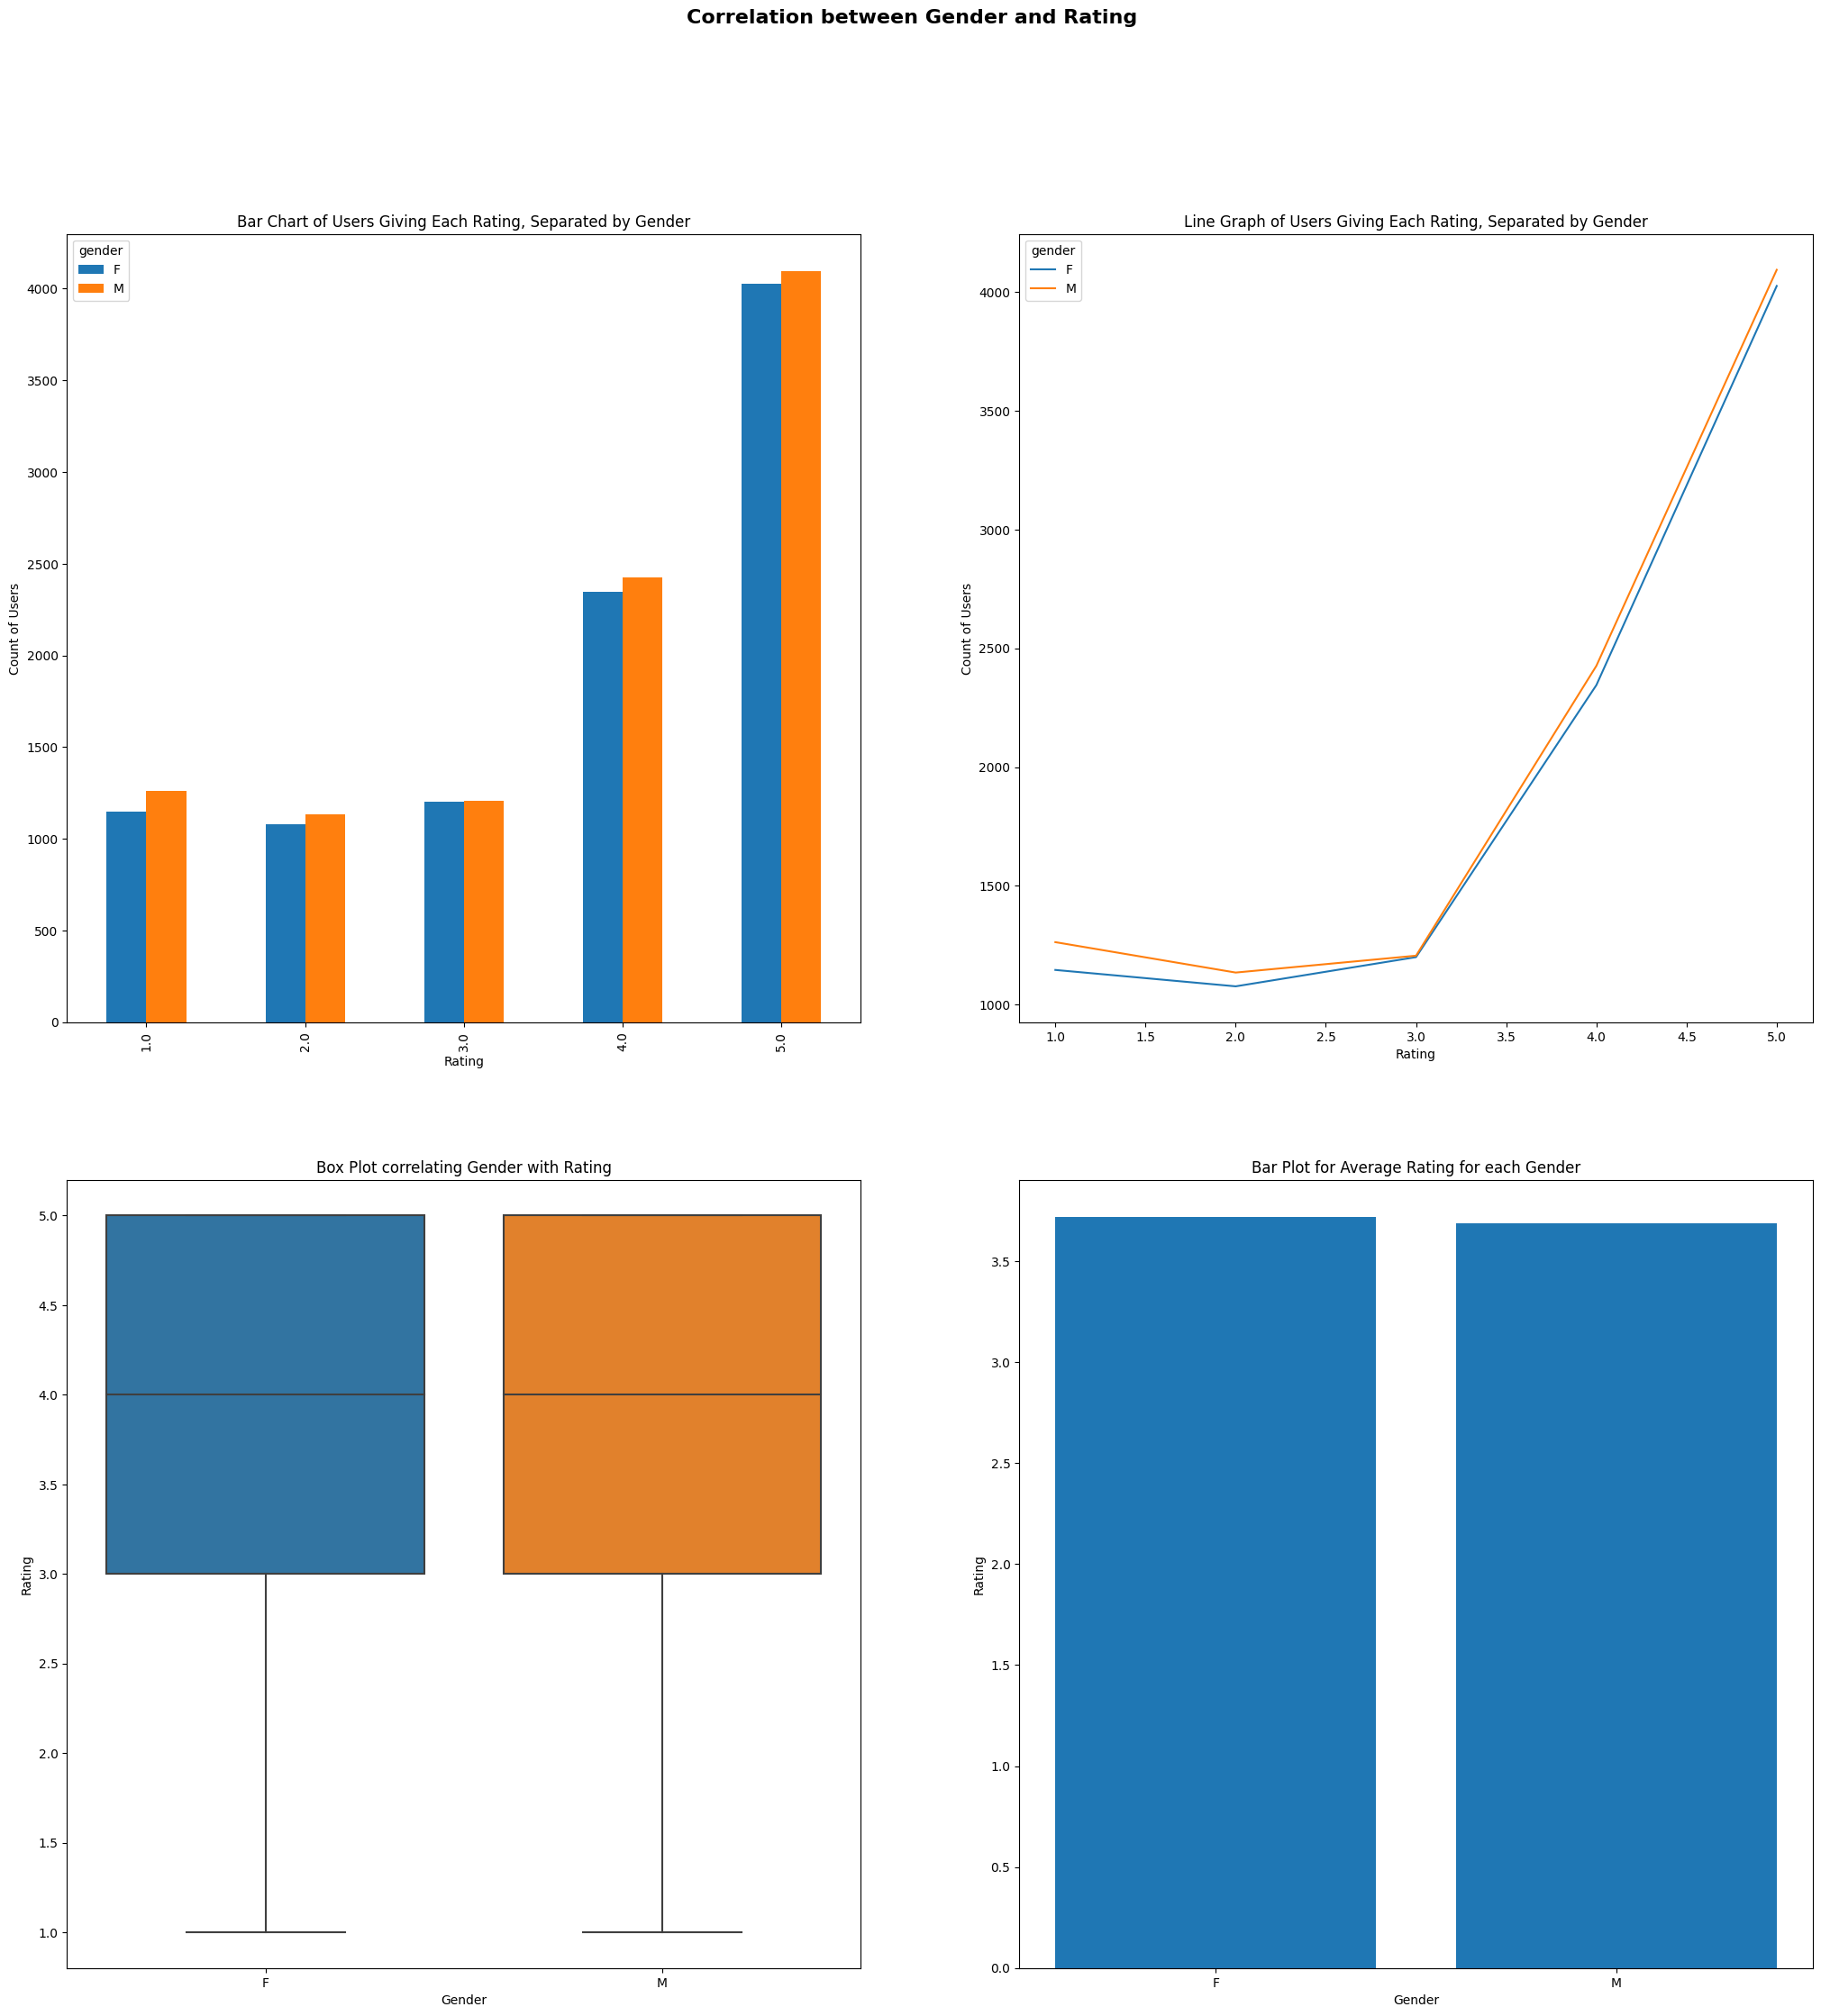

In [12]:

# Creating the figure and dividing into 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))

# Adding bar, line, box subplots
gender_rating_count.plot(kind='bar', ax=axes[0,0])
gender_rating_count.plot(ax=axes[0,1])
sns.boxplot(x='gender', y='rating', data=cleaned_data_frame, ax=axes[1,0])
axes[1,1].bar(gender_rating_mean.index, gender_rating_mean.values)

# Adding a title to the entire figure
fig.suptitle('Correlation between Gender and Rating', fontsize=16, fontweight='bold')

# Adding axes labels and Title to the bar plot
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Count of Users')
axes[0,0].set_title('Bar Chart of Users Giving Each Rating, Separated by Gender')

# Adding axes labels and Title to the line graph
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Count of Users')
axes[0,1].set_title('Line Graph of Users Giving Each Rating, Separated by Gender')

# Adding axes labels and Title to the box plot
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Rating')
axes[1,0].set_title('Box Plot correlating Gender with Rating')

# Adding axes labels and Title to the average bar plot
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Rating')
axes[1,1].set_title('Bar Plot for Average Rating for each Gender')


 __Correlation between Helpfulness and Rating__

For correlation of Helpfulness of Feedback with Rating, a similar approach is adopted as before. 

This time the plots show an interesting trend that majority of the reviews are rated 4 (maximum) on their helpfulness, regardless of the rating they have given. What should be more interesting is that after 4, majority of the reviews are given 0 on their helpfulness. Very few are given 1 or 2, regardless of the rating they have given.
Furthermore, the trends for every group of helpfulness ratings is similar in the sense that no matter how helpful a review, majority of them give 5 rating to the item.

The boxplot shows that all the reviews have similar quartiles, minimum, maximum values other than the reviews given 2 on their helpfulness. This is a minor skewness, which if taken along with the total count of these reviews makes it an insignificant observation.

The bar plot for average rating shows almost similar values regardless of helpfulness of feedback. We may infer from this information that the value of helpfulness of feedback is independent of the rating given.


Text(0.5, 1.0, 'Bar Plot for Average Rating per value of Helpfulness of Feedback')

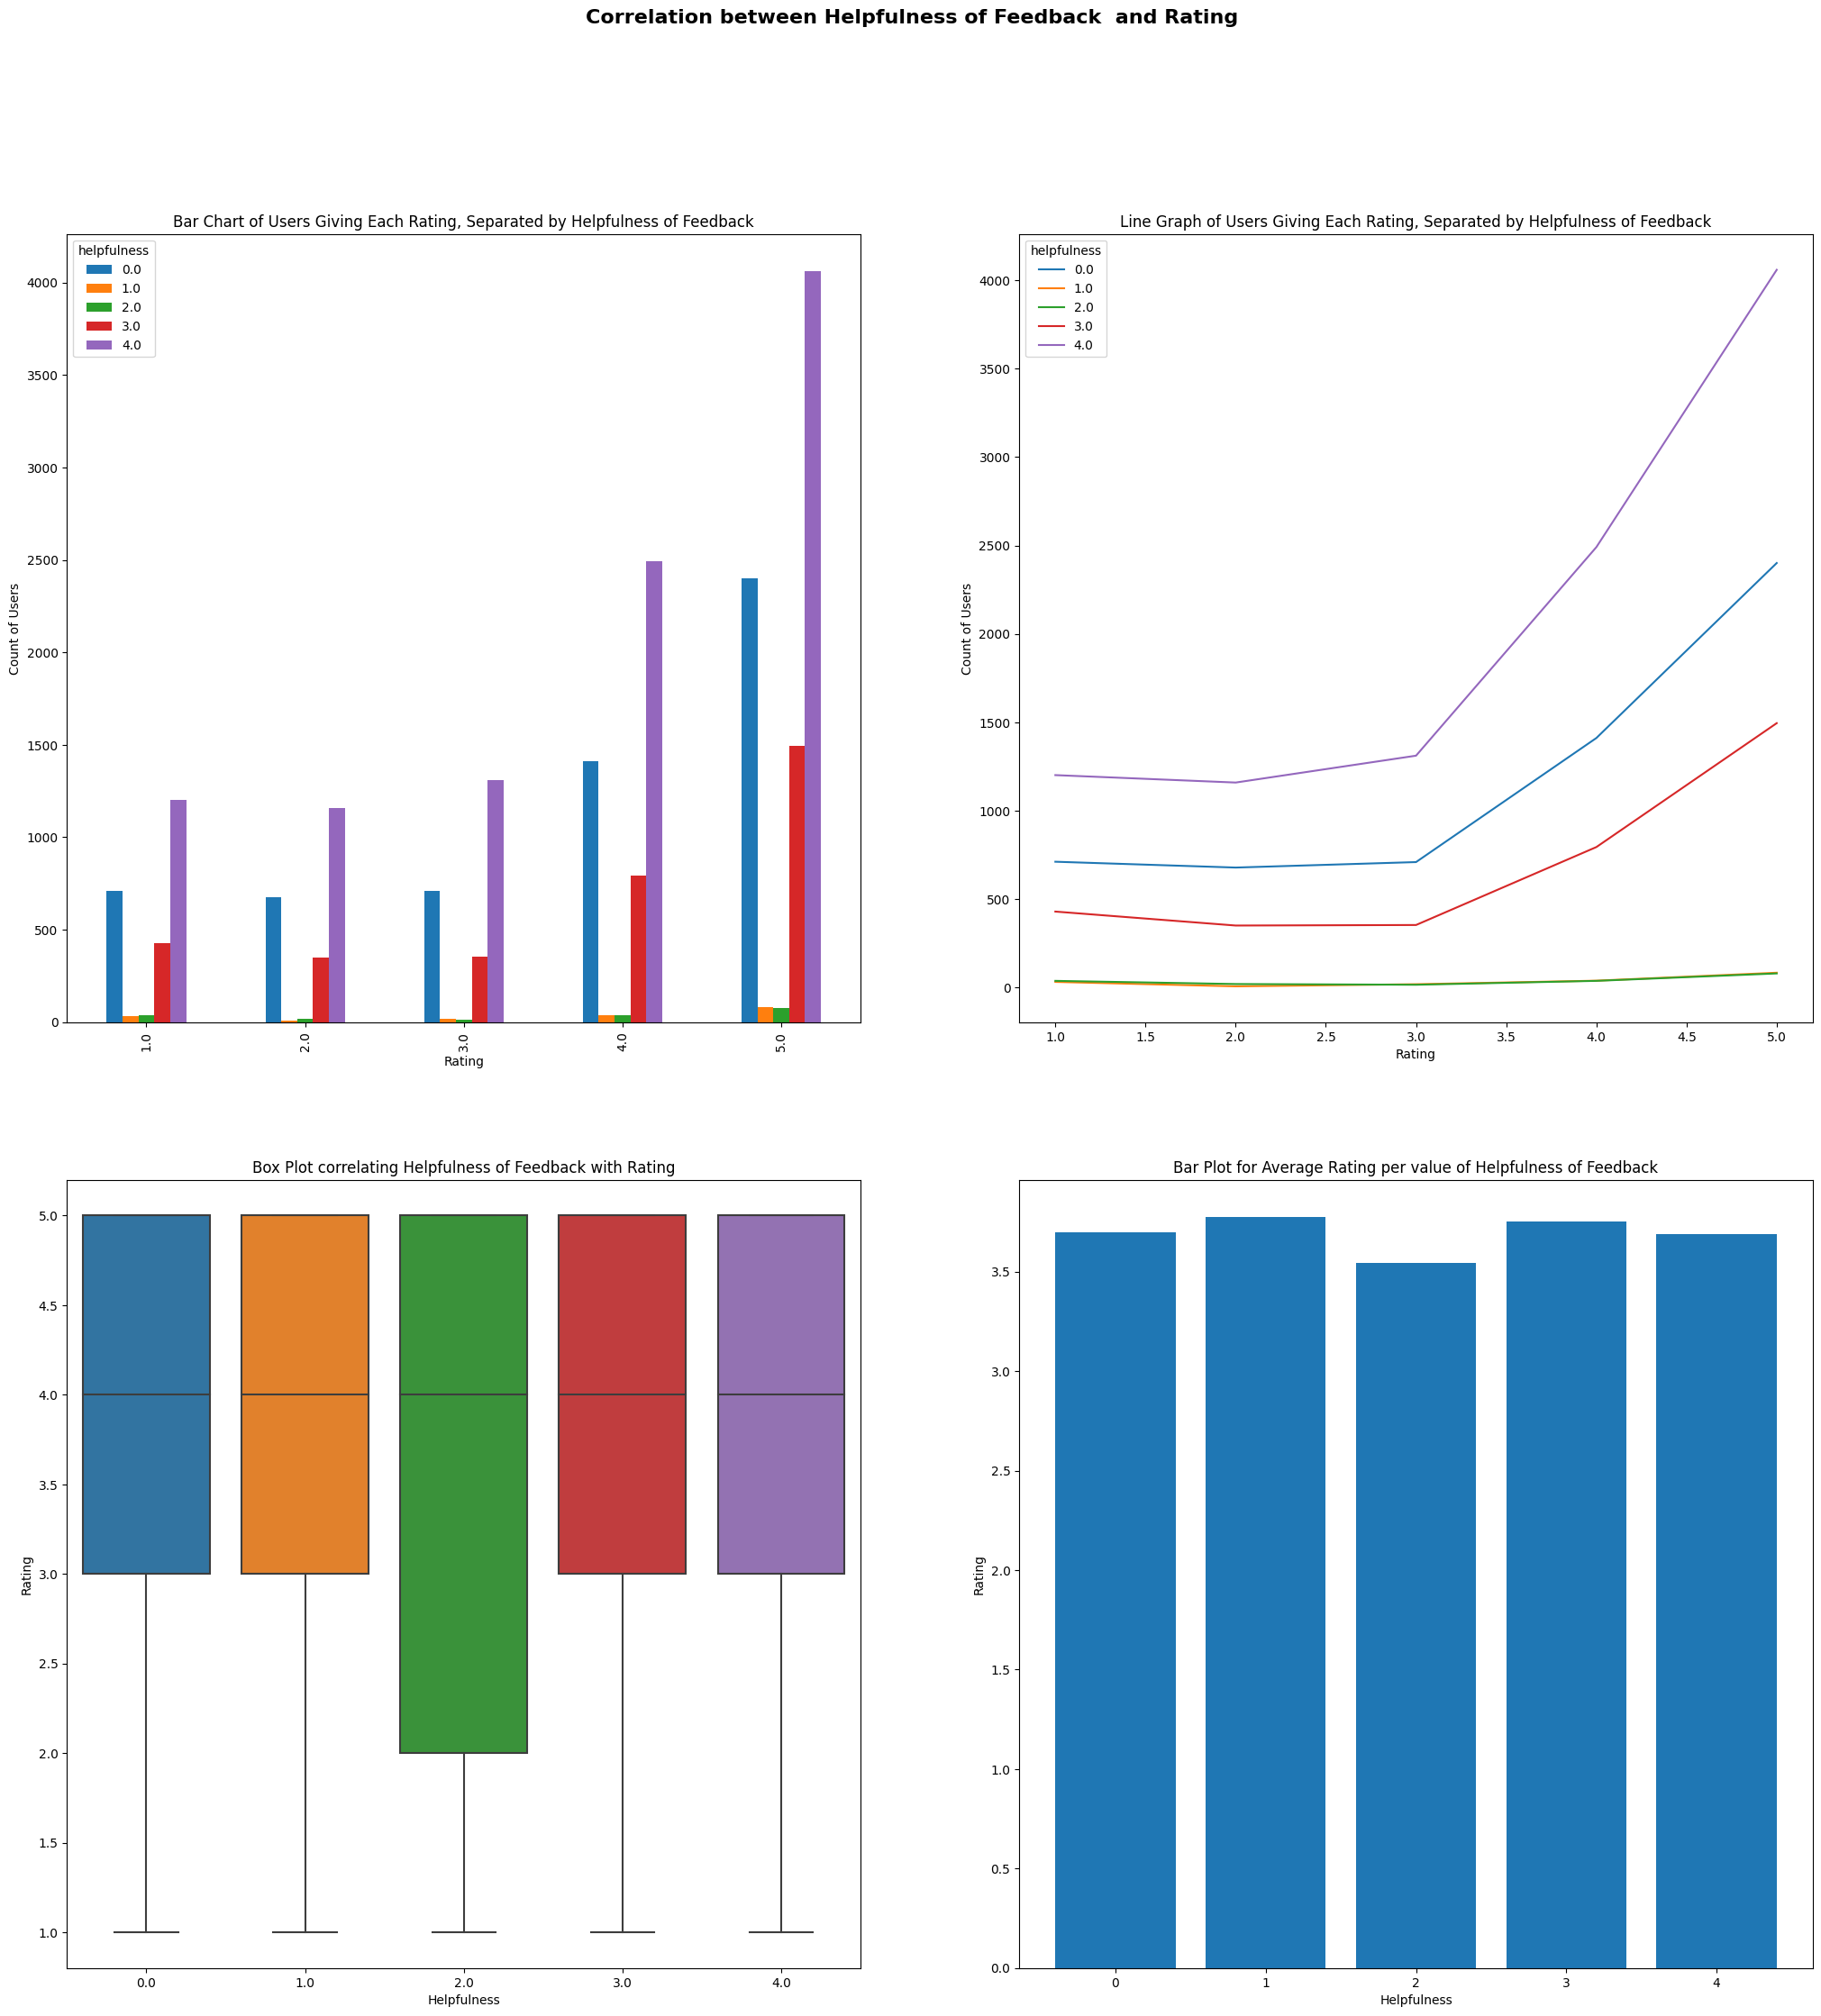

In [13]:
# Cross-Tabulation between each helpfulness and rating
helpfulness_rating_count = pd.crosstab(cleaned_data_frame['rating'], cleaned_data_frame['helpfulness'])
helpfulness_rating_mean = cleaned_data_frame.groupby('helpfulness')['rating'].mean()

# Creating the figure and dividing into 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))

# Adding bar, line, box subplots
helpfulness_rating_count.plot(kind='bar', ax=axes[0,0])
helpfulness_rating_count.plot(ax=axes[0,1])
sns.boxplot(x='helpfulness', y='rating', data=cleaned_data_frame, ax=axes[1,0])
axes[1,1].bar(helpfulness_rating_mean.index, helpfulness_rating_mean.values)

# Adding a title to the entire figure
fig.suptitle('Correlation between Helpfulness of Feedback  and Rating', fontsize=16, fontweight='bold')

# Adding axes labels and Title to the bar plot
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Count of Users')
axes[0,0].set_title('Bar Chart of Users Giving Each Rating, Separated by Helpfulness of Feedback')

# Adding axes labels and Title to the line graph
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Count of Users')
axes[0,1].set_title('Line Graph of Users Giving Each Rating, Separated by Helpfulness of Feedback')

# Adding axes labels and Title to the box plot
axes[1,0].set_xlabel('Helpfulness')
axes[1,0].set_ylabel('Rating')
axes[1,0].set_title('Box Plot correlating Helpfulness of Feedback with Rating')

# Adding axes labels and Title to the average bar plot
axes[1,1].set_xlabel('Helpfulness')
axes[1,1].set_ylabel('Rating')
axes[1,1].set_title('Bar Plot for Average Rating per value of Helpfulness of Feedback')


**Correlation between Category and Rating**

Same as before a bar plot, a line graph and a box-plot seemed to be the most appropriate for displaying the data of relation between each category and their respective ratings completely.

The bar and line plots show that the category _'Movies'_ has the most number of ratings, followed by _'Online Stores & Services'_ and then _'Games'_ and _'Restaurants & Gourmet'_
The trends for _'Movies'_ and _'Games'_ are quite similar despite total number of each of their ratings, where majority users rate 5 and a sharp decrease for every lower rating. The trend for _'Online Stores & Services'_ still shows majority users rating 5 however there are almost the same number of users giving 1 and 4 rating while very few rated this category 2 or 3. The trend for _'Restaurants & Gourmet'_ shows a slight steady increase between ratings 1 to 4, but then a stagnation from ratings 4 to 5. Other categories have very insignificant number of users to be analysed properly through these charts.

The boxplot shows that most categories have similar quartiles, maximum, minimum values. The only discrepancies are as follows: 
- The category _'Media'_ is skewed towards rating 1, which is bad. 
- The category '_Movies_' is skewed towards rating 5, which is good. 75% of ratings are 3 or more. 50% are 4 or more.
- The categories '_Games_' and '_Books_' show all ratings to be positive. (3 or more for _'games'_ and 5 for _'books'_). This is considered good for the category _games_ due to a significant number of reviews, however it is not the case for the category _books_ which has very few number of reviews.

The bar plot for average rating per category shows that *'Books'* are the most highly rated on average. However, from the other graphs we know that books are not reviewed/rated very often. '*Games*' on the other hand have been rated quite a few times and they have the second highest average rating. '*Movies*' is the third highest rated category on average, and for the sheer number of reviews, having such a positive rating is very impressive. Unsurprisingly, '*Media*' has the lowest average rating. The rest of the categories are pretty much similar

Text(0.5, 1.0, 'Bar Plot for Average Rating per Category')

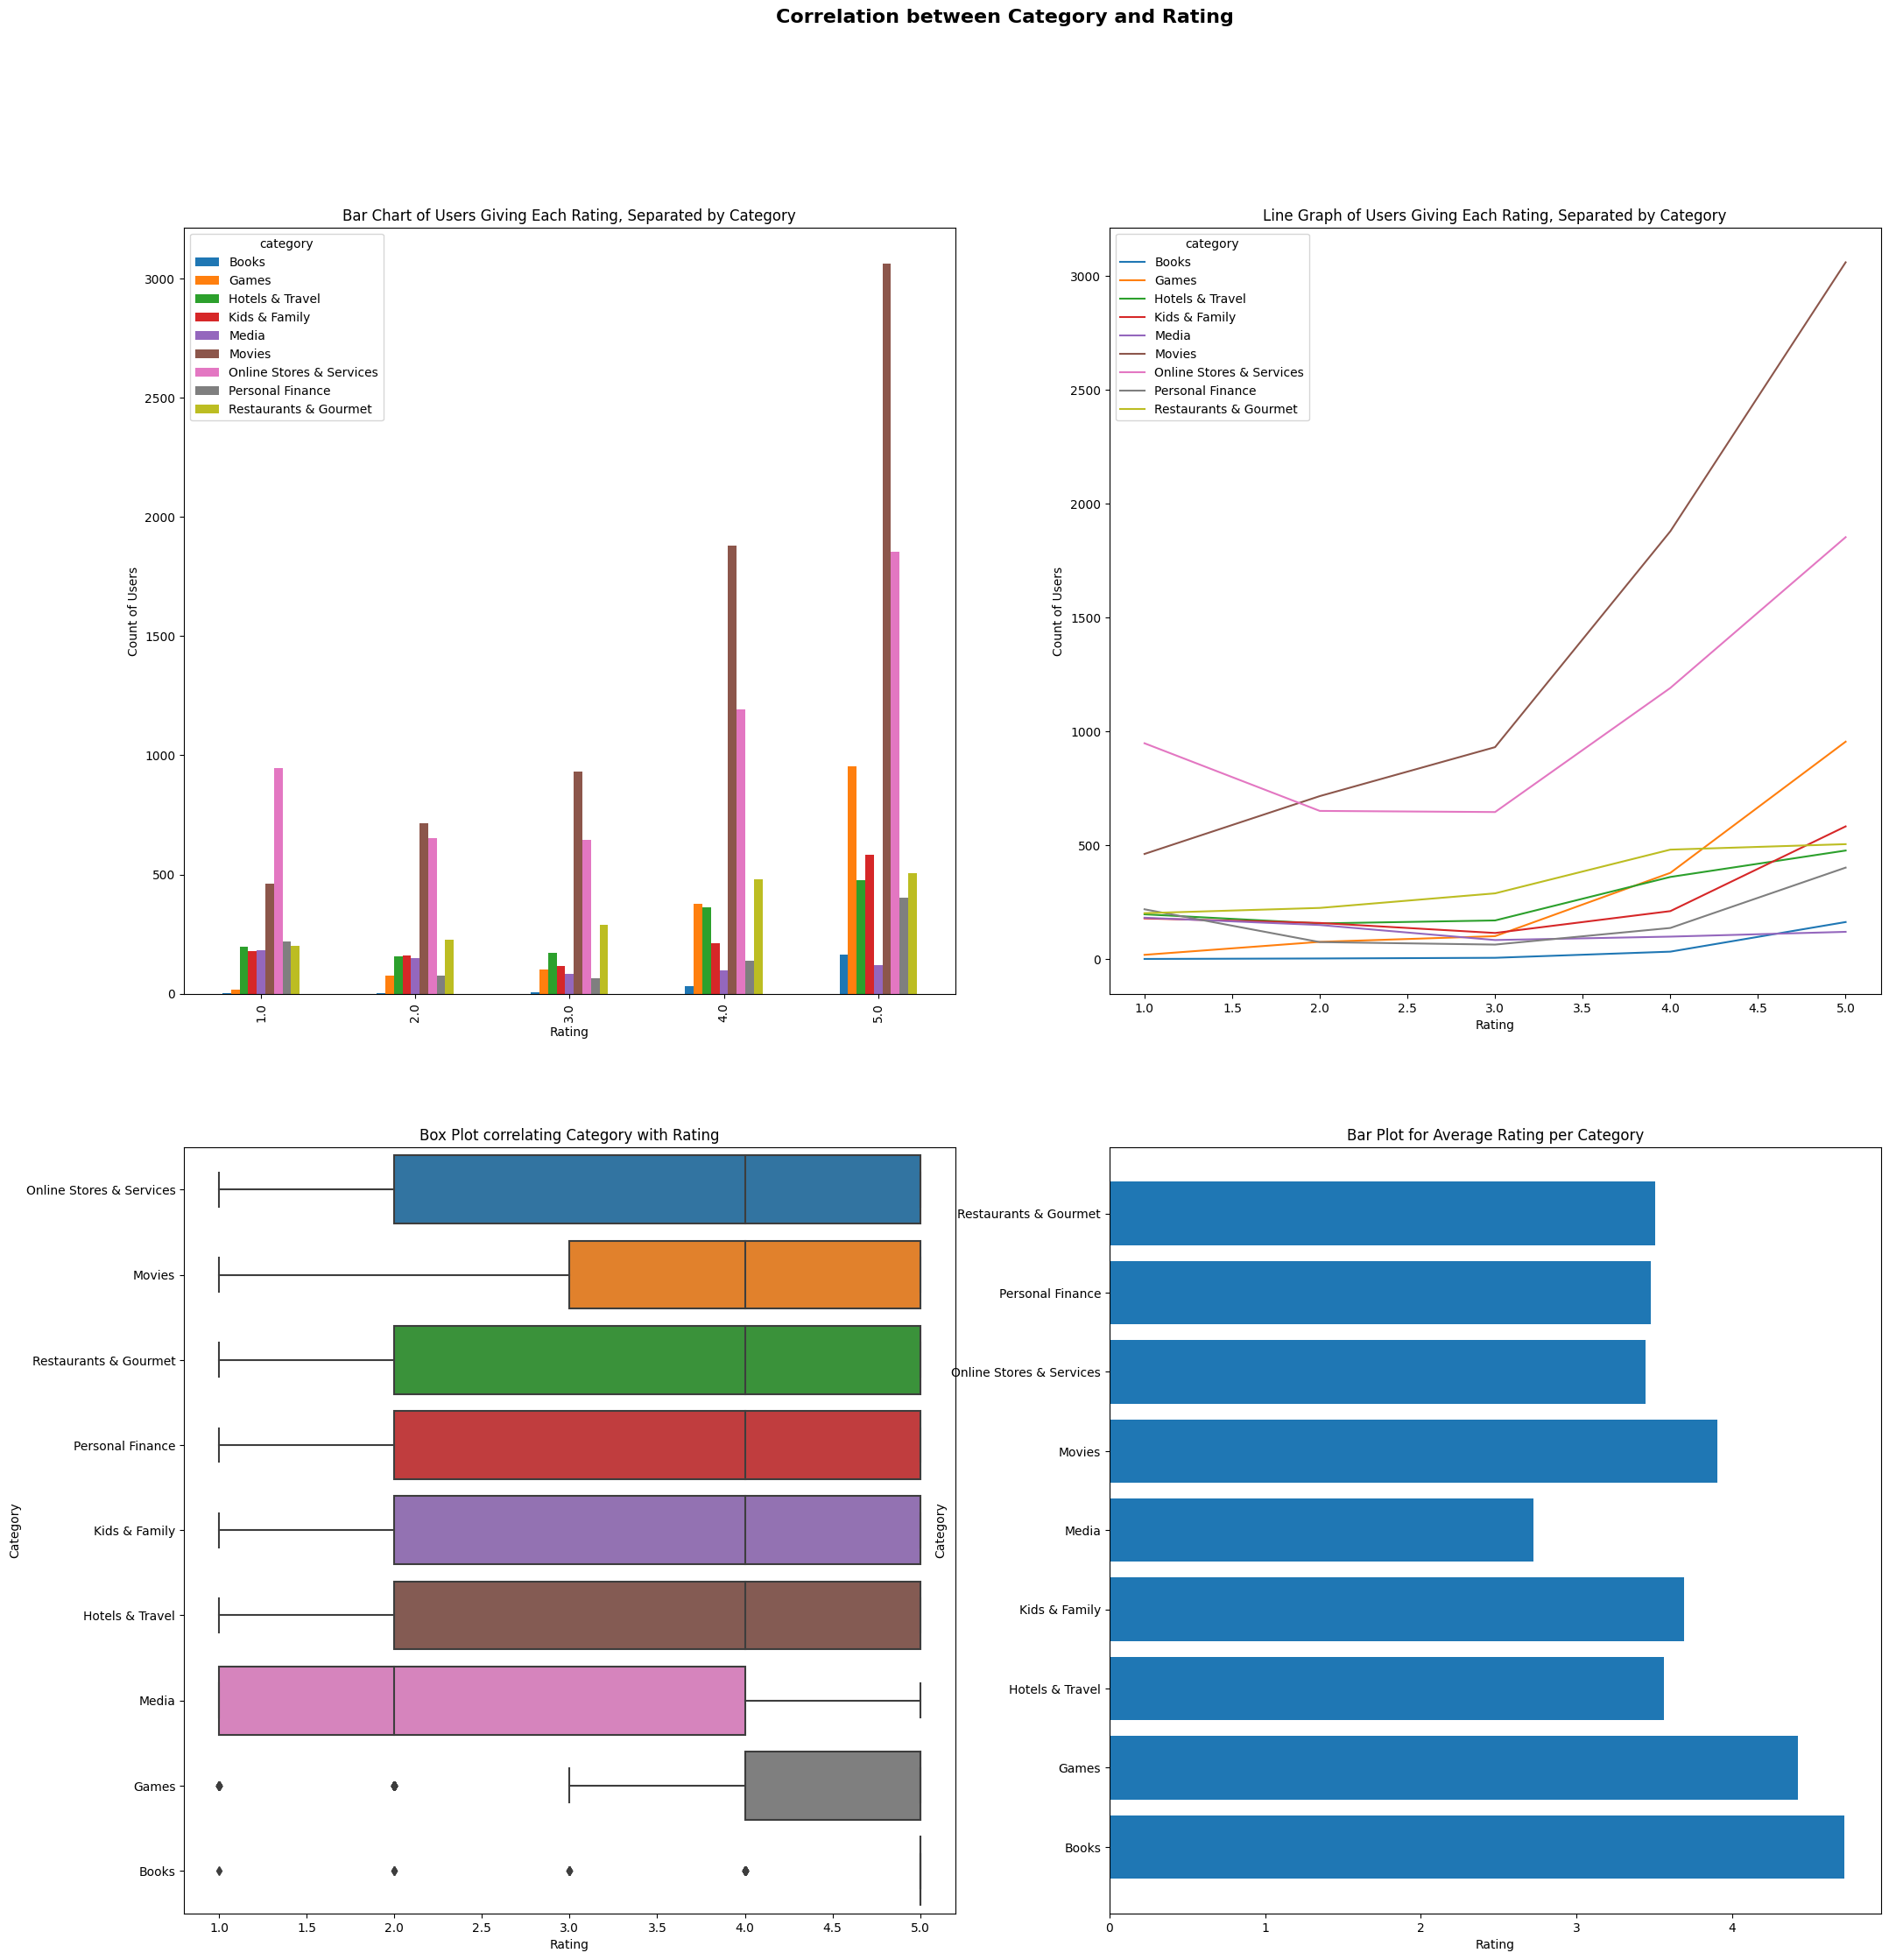

In [14]:

# Cross-Tabulation between each category and rating
category_rating_count = pd.crosstab(cleaned_data_frame['rating'], cleaned_data_frame['category'])
category_rating_mean = cleaned_data_frame.groupby('category')['rating'].mean()

# Creating the figure and dividing into 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))

# Adding bar, line, box subplots
category_rating_count.plot(kind='bar', ax=axes[0,0])
category_rating_count.plot(ax=axes[0,1])
sns.boxplot(y='category', x='rating', data=cleaned_data_frame, ax=axes[1,0])
axes[1,1].barh(category_rating_mean.index, category_rating_mean.values)

# Adding a title to the entire figure
fig.suptitle('Correlation between Category and Rating', fontsize=16, fontweight='bold')

# Adding axes labels and Title to the bar plot
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Count of Users')
axes[0,0].set_title('Bar Chart of Users Giving Each Rating, Separated by Category')

# Adding axes labels and Title to the line graph
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Count of Users')
axes[0,1].set_title('Line Graph of Users Giving Each Rating, Separated by Category')

# Adding axes labels and Title to the box plot
axes[1,0].set_ylabel('Category')
axes[1,0].set_xlabel('Rating')
axes[1,0].set_title('Box Plot correlating Category with Rating')

# Adding axes labels and Title to the average bar plot
axes[1,1].set_ylabel('Category')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_title('Bar Plot for Average Rating per Category')


**Overall Summary**

After analysing the plots, we can conclude: 
- There is nearly no gender bias for positive or negative ratings. Males seem to have a slightly higher tendency to give lower ratings than females. Females have a slightly higher mean for overall ratings given. 
    - This can be explained by a number of factors such as the item being reviewed and other behavioral aspects that may impact ratings
- The helpfulness of reviews is independent of the rating they have given and reviews are most often helpful. 
    - Most reviews are specific about what they liked/disliked about an item and this helps other users make a decision about whether or not to make a purchase. The second most prominent types of reviews are vague with little to no details given, because many users can't be bothered to spend some time on writing a review. Hence these are considered not helpful. Reviews in general are therefore very helpful or very unhelpful as can be seen from the plots.
- The overwhelming majority of reviews are for Movies or Online Stores & Services. Games and Movies have high number of reviews and high ratings. Books have low number of reviews but high ratings. Media category has low number of reviews and poor ratings.
    - The plots suggest a certain pattern of consumerism between the given user group. A very small number of people read/buy books and then give reviews, and people generally have a little background info about books before they buy hence the high rating as they got what they expected. The same can be said for Games and Movies, where the users generally have an idea about what they are getting into.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

- Defining the Outlier Rules

In [15]:

no_outliers = cleaned_data_frame

# Define outlier rules
helpfulness_threshold = 2
min_ratings_per_user = 7
min_ratings_per_item = 11


- Removing Outliers based on low helpfulness

In [16]:

# Filter out outlier reviews based on helpfulness
no_outliers = no_outliers[cleaned_data_frame['helpfulness'] > helpfulness_threshold]


- Removing Outliers based on users with low number of ratings given

In [17]:

# Filter out outlier users based on the number of ratings they gave
user_ratings_counts = no_outliers['userId'].value_counts()
users_with_enough_ratings = user_ratings_counts[user_ratings_counts >= min_ratings_per_user].index
no_outliers = no_outliers[no_outliers['userId'].isin(users_with_enough_ratings)]


- Removing Outliers based on items with low number of ratings received

In [18]:

# Filter out outlier items based on the number of ratings they received
item_ratings_counts = no_outliers['item_id'].value_counts()
items_with_enough_ratings = item_ratings_counts[item_ratings_counts >= min_ratings_per_item].index
no_outliers = no_outliers[no_outliers['item_id'].isin(items_with_enough_ratings)]


- Printing the length of data after removing all Outliers

In [19]:

# Reset index after filtering
no_outliers.reset_index(drop=True, inplace=True)
print("Length of data after removing outliers Linearly: ", len(no_outliers))


Length of data after removing outliers Linearly:  2685
